In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import adjusted_rand_score

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [3]:
sys.path.append('../..')
from pygraphs.cluster import KernelKMeans, Ward, KernelKMeansSklearn, KernelWardSklearn
from pygraphs.graphs.generators import StochasticBlockModel, StochasticBlockModel2, RubanovModel
from pygraphs.measure import *
from pygraphs.measure import H_kernels_plus_RSP_FE, scaler
from pygraphs.scenario import ParallelByGraphs, plot_results

In [5]:
H_kernels_plus_RSP_FE, len(H_kernels_plus_RSP_FE)

([pygraphs.measure.kernel.pWalk_H,
  pygraphs.measure.produced.Walk_H,
  pygraphs.measure.kernel.For_H,
  pygraphs.measure.produced.logFor_H,
  pygraphs.measure.kernel.Comm_H,
  pygraphs.measure.produced.logComm_H,
  pygraphs.measure.kernel.Heat_H,
  pygraphs.measure.produced.logHeat_H,
  pygraphs.measure.kernel.SCT_H,
  pygraphs.measure.kernel.SCCT_H,
  pygraphs.measure.produced.SPCT_H,
  pygraphs.measure.produced.RSP_K,
  pygraphs.measure.produced.FE_K],
 13)

In [8]:
sbm_graphs, _ = StochasticBlockModel(100, 2, 0.3, 0.1).generate_graphs(50)
rubanov_graphs, _ = RubanovModel(np.array([50, 50]), np.array([[0.3, 0.15],
                                                               [0.15, 0.3]])).generate_graphs(50)

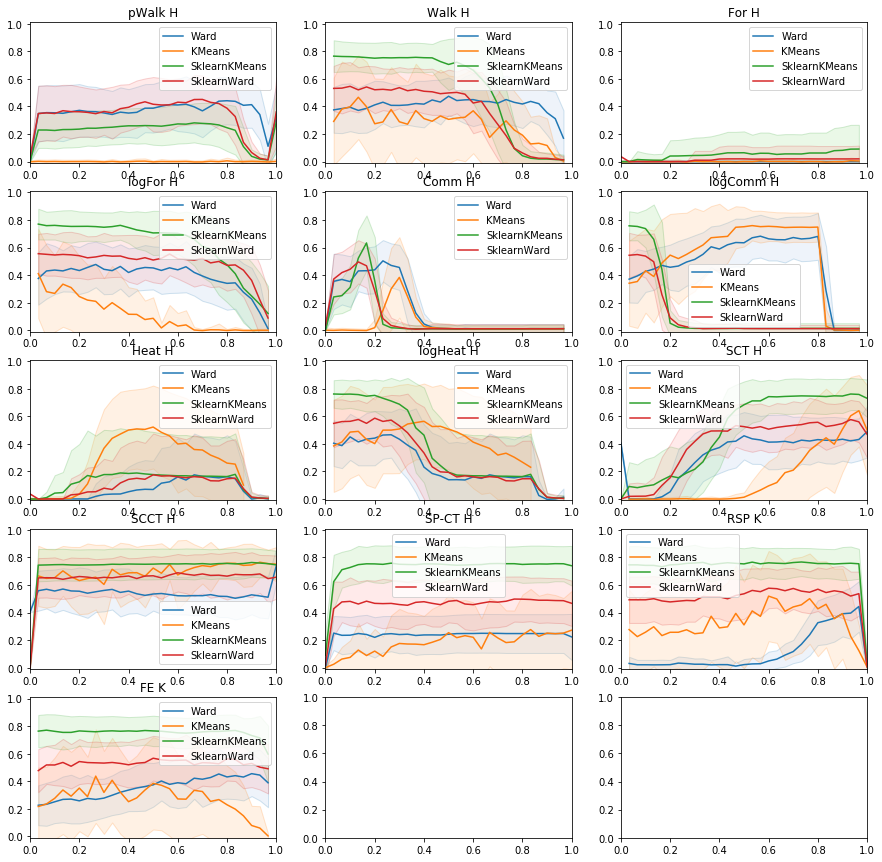

In [9]:
fig, ax = plt.subplots(5, 3, figsize=(15, 15))
for idx, measure in enumerate(tqdm(H_kernels_plus_RSP_FE)):
    axi = ax[idx // 3][idx % 3]
    pbg = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 31), progressbar=False, verbose=False)
    plot_results(axi, [
        ('Ward', *pbg.perform(Ward, measure, rubanov_graphs, 2, n_jobs=-1)),
        ('KMeans', *pbg.perform(KernelKMeans, measure, rubanov_graphs, 2, n_jobs=-1)),
        ('SklearnKMeans', *pbg.perform(KernelKMeansSklearn, measure, rubanov_graphs, 2, n_jobs=-1)),
        ('SklearnWard', *pbg.perform(KernelWardSklearn, measure, rubanov_graphs, 2, n_jobs=-1))
    ])
    axi.set_title(measure.name)
    axi.legend()

# One graph test

In [7]:
two_classes = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 1, 1, 0]
], dtype=np.float64)
answer = [1, 1, 1, 1, 2, 2, 2, 2]
graphs = [(two_classes, answer)] * 100

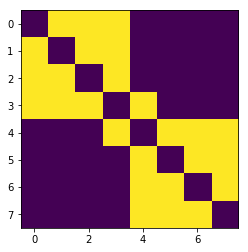

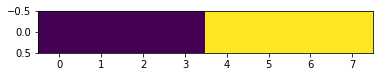

In [9]:
plt.imshow(two_classes)
plt.show()

plt.imshow([answer])
plt.show()

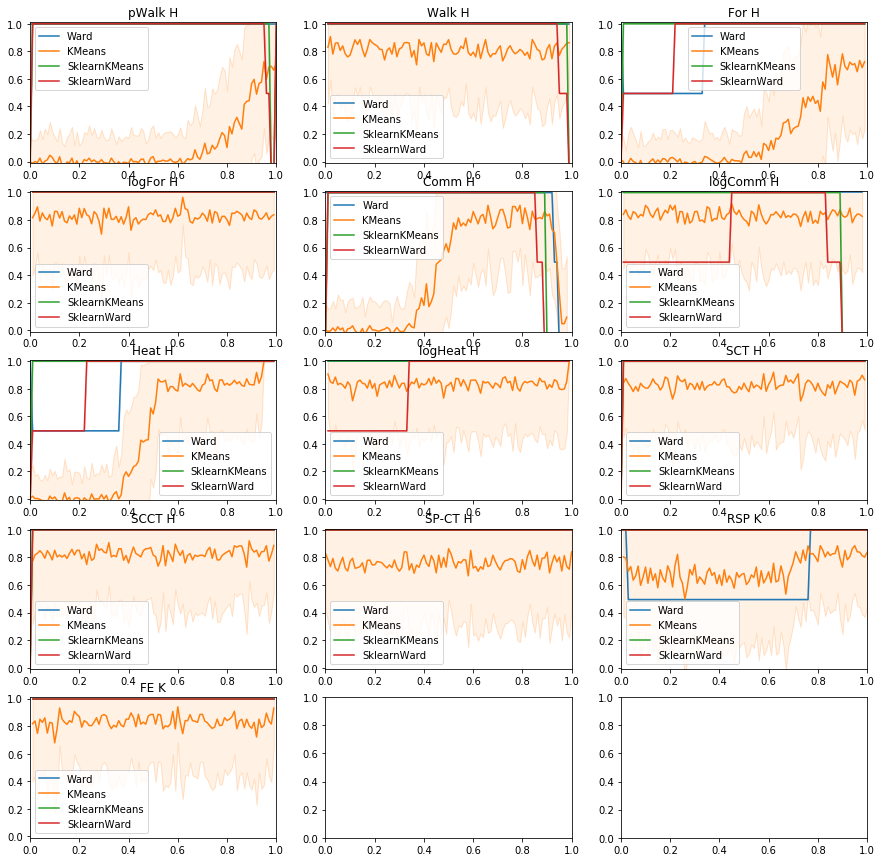

In [11]:
fig, ax = plt.subplots(5, 3, figsize=(15, 15))
for idx, measure in enumerate(tqdm(H_kernels_plus_RSP_FE)):
    axi = ax[idx // 3][idx % 3]
    pbg = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 101), progressbar=False, verbose=False)
    plot_results(axi, [
        ('Ward', *pbg.perform(Ward, measure, graphs, 2, n_jobs=-1)),
        ('KMeans', *pbg.perform(KernelKMeans, measure, graphs, 2, n_jobs=-1)),
        ('SklearnKMeans', *pbg.perform(KernelKMeansSklearn, measure, graphs, 2, n_jobs=-1)),
        ('SklearnWard', *pbg.perform(KernelWardSklearn, measure, graphs, 2, n_jobs=-1))
    ])
    axi.set_title(measure.name)
    axi.legend()

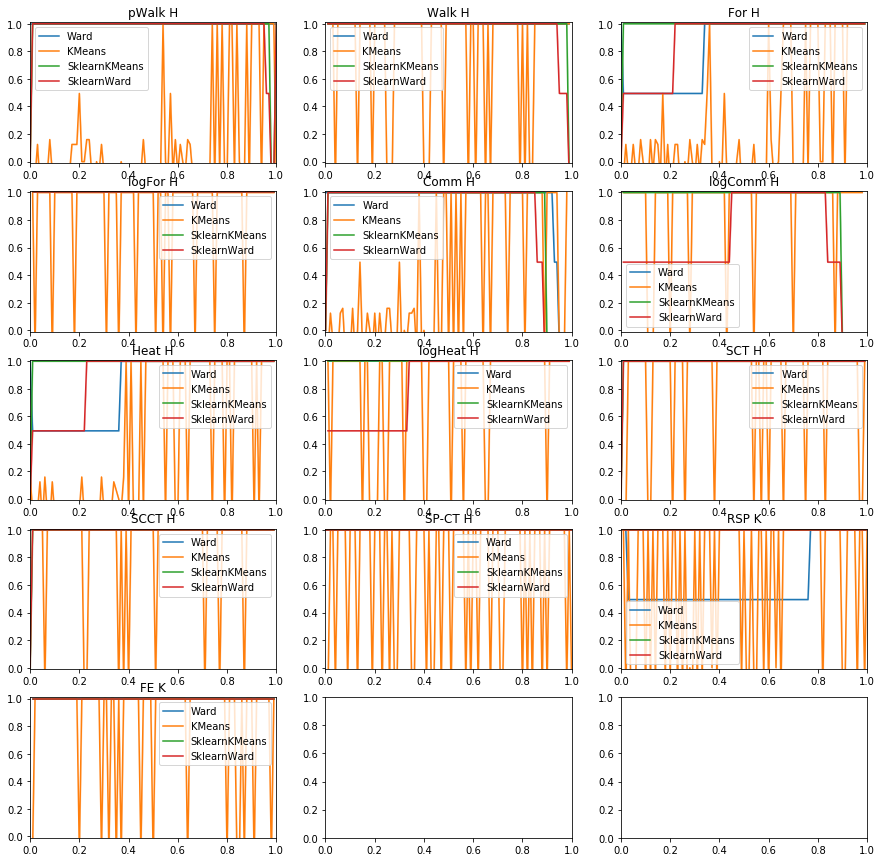

In [12]:
fig, ax = plt.subplots(5, 3, figsize=(15, 15))
for idx, measure in enumerate(tqdm(H_kernels_plus_RSP_FE)):
    axi = ax[idx // 3][idx % 3]
    pbg = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 101), progressbar=False, verbose=False)
    plot_results(axi, [
        ('Ward', *pbg.perform(Ward, measure, [graphs[0]], 2, n_jobs=-1)),
        ('KMeans', *pbg.perform(KernelKMeans, measure, [graphs[0]], 2, n_jobs=-1)),
        ('SklearnKMeans', *pbg.perform(KernelKMeansSklearn, measure, [graphs[0]], 2, n_jobs=-1)),
        ('SklearnWard', *pbg.perform(KernelWardSklearn, measure, [graphs[0]], 2, n_jobs=-1))
    ])
    axi.set_title(measure.name)
    axi.legend()

In [13]:
two_classes = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 1, 1, 0]
], dtype=np.float64)
answer = [1, 1, 1, 1, 2, 2, 2, 2]
graphs = [(1 / (two_classes + 1), answer)] * 100

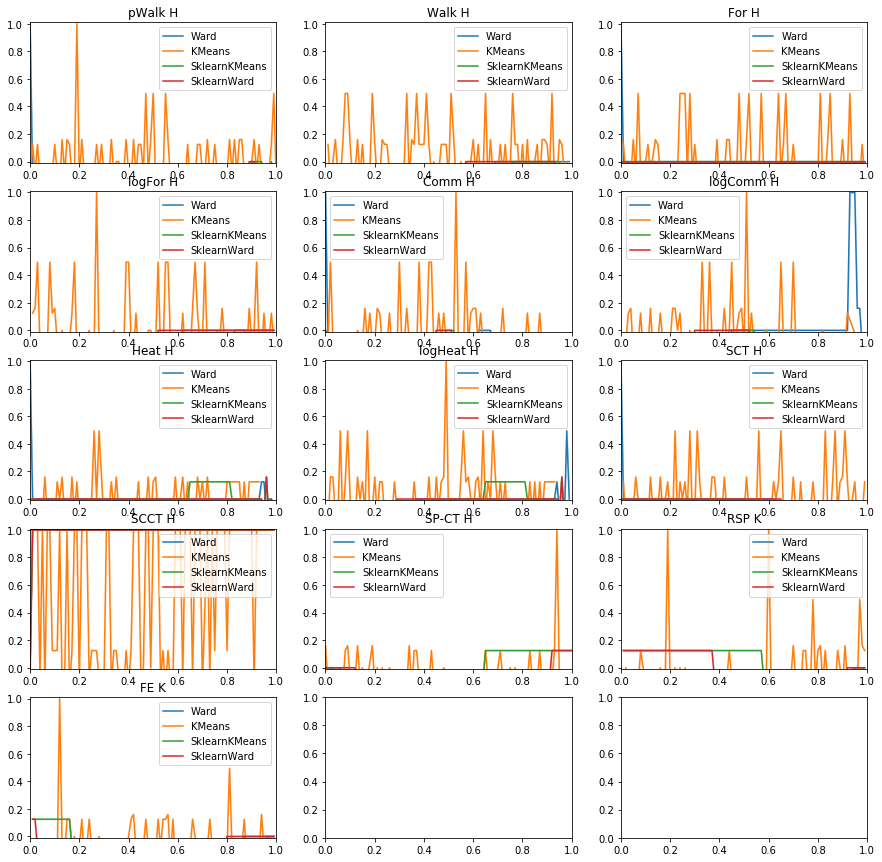

In [14]:
fig, ax = plt.subplots(5, 3, figsize=(15, 15))
for idx, measure in enumerate(tqdm(H_kernels_plus_RSP_FE)):
    axi = ax[idx // 3][idx % 3]
    pbg = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 101), progressbar=False, verbose=False)
    plot_results(axi, [
        ('Ward', *pbg.perform(Ward, measure, [graphs[0]], 2, n_jobs=-1)),
        ('KMeans', *pbg.perform(KernelKMeans, measure, [graphs[0]], 2, n_jobs=-1)),
        ('SklearnKMeans', *pbg.perform(KernelKMeansSklearn, measure, [graphs[0]], 2, n_jobs=-1)),
        ('SklearnWard', *pbg.perform(KernelWardSklearn, measure, [graphs[0]], 2, n_jobs=-1))
    ])
    axi.set_title(measure.name)
    axi.legend()

# Rubanov vs mine

In [6]:
sbm_graphs, _ = StochasticBlockModel(100, 2, 0.3, 0.1).generate_graphs(100)
sbm2_graphs, _ = StochasticBlockModel2(100, 2, 0.3, 0.1).generate_graphs(100)
rubanov_graphs, _ = RubanovModel(np.array([50, 50]), np.array([[0.3, 0.1],
                                                               [0.1, 0.3]])).generate_graphs(100)

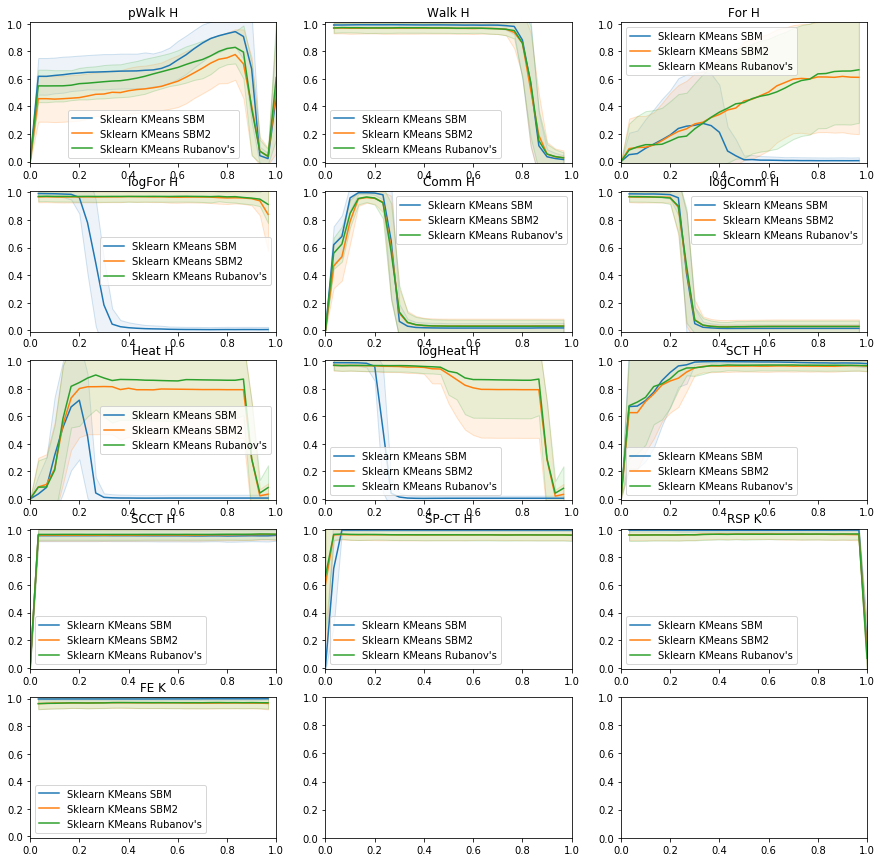

In [7]:
fig, ax = plt.subplots(5, 3, figsize=(15, 15))
for idx, measure in enumerate(tqdm(H_kernels_plus_RSP_FE)):
    axi = ax[idx // 3][idx % 3]
    pbg = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 31), progressbar=False, verbose=False)
    plot_results(axi, [
        ('Sklearn KMeans SBM', *pbg.perform(KernelKMeansSklearn, measure, sbm_graphs, 2, n_jobs=-1)),
        ('Sklearn KMeans SBM2', *pbg.perform(KernelKMeansSklearn, measure, sbm2_graphs, 2, n_jobs=-1)),
        ('Sklearn KMeans Rubanov\'s', *pbg.perform(KernelKMeansSklearn, measure, rubanov_graphs, 2, n_jobs=-1))
    ])
    axi.set_title(measure.name)
    axi.legend()